In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns

In [3]:
# Dataset
data = os.listdir("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Training/")
classes = {"no_tumor" : 0, "Yes" : 1}

In [4]:
X = []
Y = []
for cls in classes:
    path = "E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Training/" + cls
    for j in os.listdir(path):
        img = cv2.imread(path+"/"+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
X = np.array(X)
Y = np.array(Y)

In [7]:
pd.Series(Y).value_counts()

1    2475
0     395
Name: count, dtype: int64

Visualize data

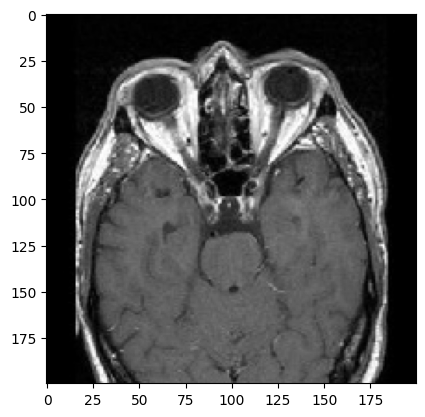

In [8]:
plt.imshow(X[0], cmap="gray")
plt.show()

# Prepare Data

In [9]:
X.shape

(2870, 200, 200)

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

# Splitting Data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, test_size = 0.2, random_state = 10)

In [13]:
X_train.shape, X_test.shape

((2296, 40000), (574, 40000))

# Featuer Scalling

In [14]:
X_train = X_train/255
X_test = X_test/255
print(X_train)
print(X_test)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00392157 0.00392157 0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.01176471 0.01176471 0.01176471 ... 0.00392157 0.00784314 0.00784314]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# train Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [16]:
lg = LogisticRegression(C =0.1 ,random_state = 42)

In [17]:
lg.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42)

In [18]:
random = RandomForestClassifier(n_estimators = 100, criterion = "gini",  random_state = 42)

In [19]:
random.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
DcTree = DecisionTreeClassifier(criterion = "gini", random_state = 42)

In [21]:
DcTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
SupportVector = SVC()

In [23]:
SupportVector.fit(X_train, y_train)

SVC()

In [24]:
print("Training Score", lg.score(X_train, y_train))
print("Testing Score", lg.score(X_test, y_test))      

Training Score 1.0
Testing Score 0.9372822299651568


In [25]:
print("Training Score", random.score(X_train, y_train))
print("Testing Score", random.score(X_test, y_test))

Training Score 1.0
Testing Score 0.9738675958188153


In [26]:
print("Training Score", DcTree.score(X_train, y_train))
print("Testing Score", DcTree.score(X_test, y_test))

Training Score 1.0
Testing Score 0.9547038327526133


In [27]:
print("Training Score", SupportVector.score(X_train, y_train))
print("Testing Score", SupportVector.score(X_test, y_test))

Training Score 0.9804006968641115
Testing Score 0.9442508710801394


# Prediction

In [28]:
pred = SupportVector.predict(X_test)
np.where(y_test!= pred)

(array([  9,  32,  37,  76, 125, 129, 140, 146, 149, 151, 166, 174, 181,
        187, 203, 242, 313, 338, 356, 375, 423, 438, 441, 448, 453, 466,
        474, 476, 501, 512, 513, 522], dtype=int64),)

In [29]:
pred[125]

1

In [30]:
y_test[125]

0

# Test Model

In [31]:
desc = {0 : "No Tumor", 1 : "Positive Tumor"}

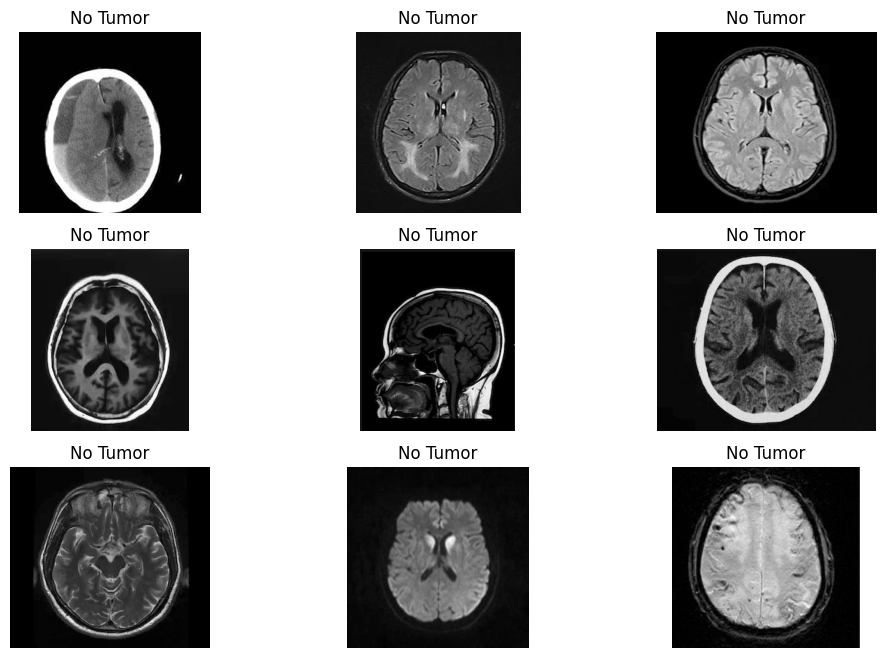

In [32]:
plt.figure(figsize = (12, 8))
path = os.listdir("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/no_tumor/")
c = 1
for i in os.listdir("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/no_tumor/")[:9]:
    plt.subplot(3,3 ,c)

    img = cv2.imread("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/no_tumor/"+i,0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1,-1)/255
    p = random.predict(img1)
    plt.title(desc[p[0]])
    plt.imshow(img, cmap = "gray")
    plt.axis("off")
    c += 1
                  

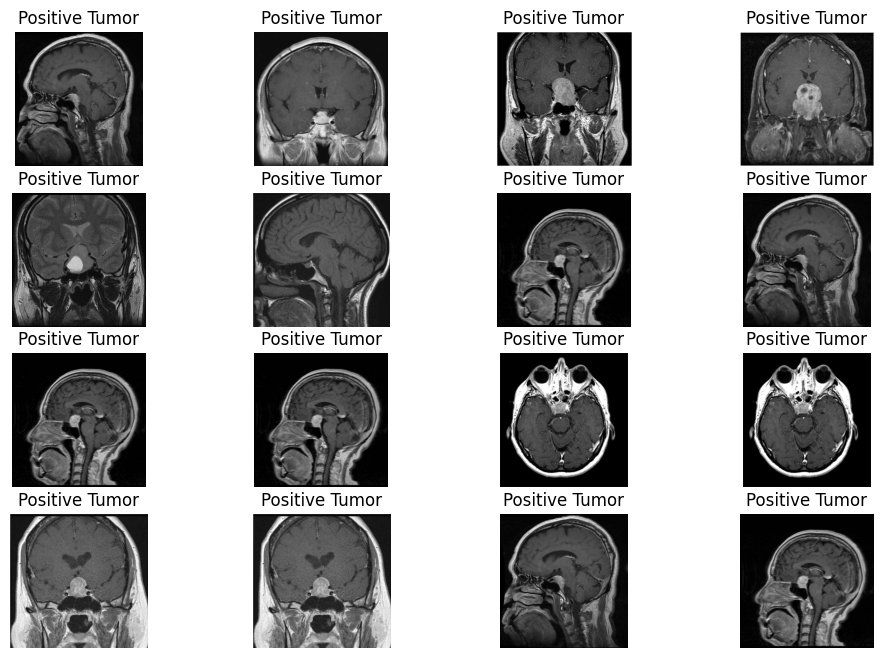

In [33]:
plt.figure(figsize = (12, 8))
path = os.listdir("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/pituitary_tumor/")
c = 1
for i in os.listdir("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/pituitary_tumor/")[:16]:
    plt.subplot(4,4 ,c)

    img = cv2.imread("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/pituitary_tumor/"+i,0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1,-1)/255
    p = random.predict(img1)
    plt.title(desc[p[0]])
    plt.imshow(img, cmap = "gray")
    plt.axis("off")
    c += 1

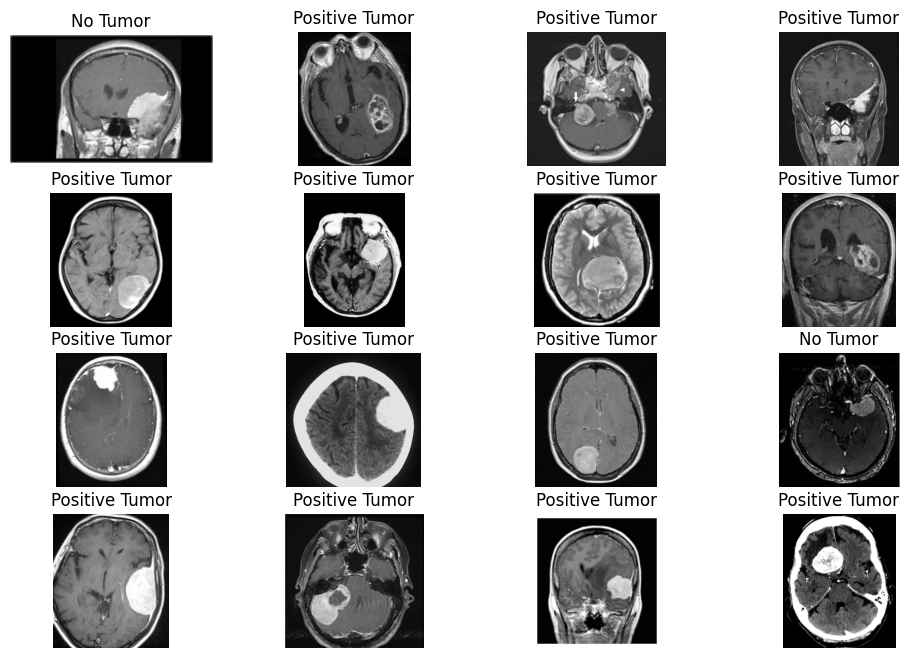

In [37]:
plt.figure(figsize = (12, 8))
path = os.listdir("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/meningioma_tumor/")
c = 1
for i in os.listdir("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/meningioma_tumor/")[:16]:
    plt.subplot(4,4 ,c)

    img = cv2.imread("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/meningioma_tumor/"+i,0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1,-1)/255
    p = random.predict(img1)
    plt.title(desc[p[0]])
    plt.imshow(img, cmap = "gray")
    plt.axis("off")
    c += 1

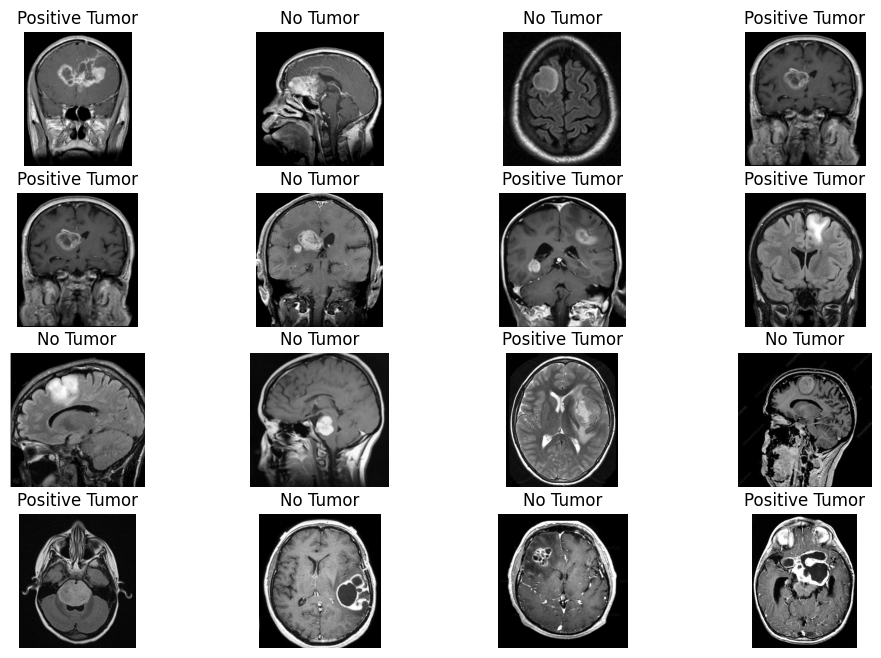

In [38]:
plt.figure(figsize = (12, 8))
path = os.listdir("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/glioma_tumor/")
c = 1
for i in os.listdir("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/glioma_tumor/")[:16]:
    plt.subplot(4,4 ,c)

    img = cv2.imread("E:/Desktop/Machine Learning/Projects/Classification/Brain Tumor Classification/Testing/glioma_tumor/"+i,0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1,-1)/255
    p = random.predict(img1)
    plt.title(desc[p[0]])
    plt.imshow(img, cmap = "gray")
    plt.axis("off")
    c += 1

# Confusion Matrix by Heatmap

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
lg_pred = lg.predict(X_test)

In [41]:
random_pred = random.predict(X_test)

In [42]:
DcTree_pred = DcTree.predict(X_test)

In [43]:
SVC_pred = SupportVector.predict(X_test)

In [44]:
conf_matrix_lg = confusion_matrix(y_test,lg_pred)
conf_matrix_random = confusion_matrix(y_test,random_pred)
conf_matrix_DcTree = confusion_matrix(y_test,DcTree_pred)
conf_matrix_SVC = confusion_matrix(y_test,SVC_pred)

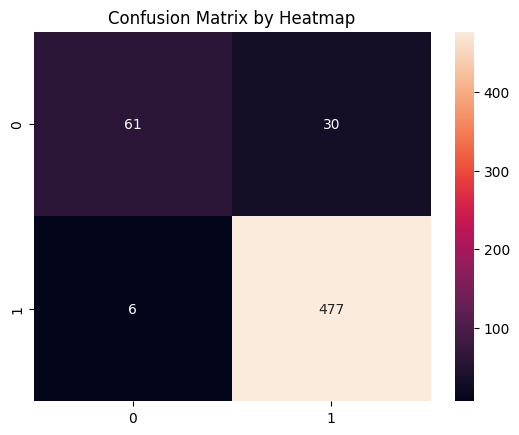

In [45]:
sns.heatmap(conf_matrix_lg, annot = True, fmt = "d", color = "blue")
plt.title("Confusion Matrix by Heatmap")
plt.show()

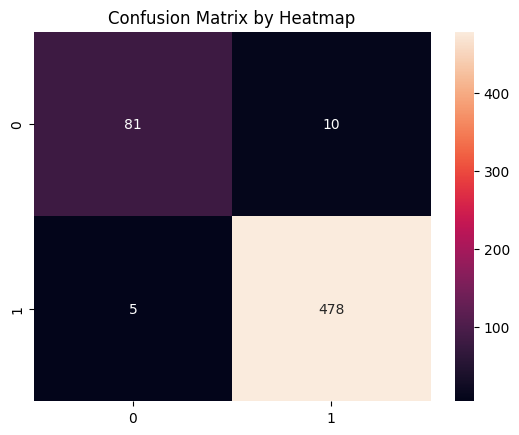

In [46]:
sns.heatmap(conf_matrix_random, annot = True, fmt = "d", color = "blue")
plt.title("Confusion Matrix by Heatmap")
plt.show()

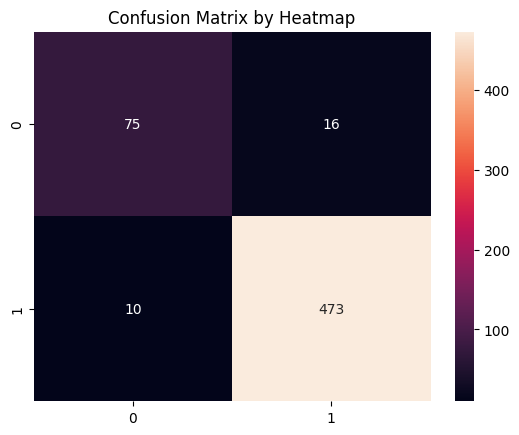

In [47]:
sns.heatmap(conf_matrix_DcTree, annot = True, fmt = "d", color = "blue")
plt.title("Confusion Matrix by Heatmap")
plt.show()

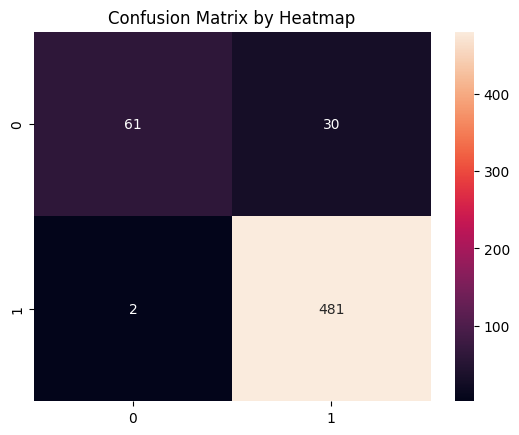

In [48]:
sns.heatmap(conf_matrix_SVC, annot = True, fmt = "d", color = "blue")
plt.title("Confusion Matrix by Heatmap")
plt.show()

In [49]:
import joblib

In [50]:
joblib.dump(random, "model.joblib")

['model.joblib']